Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [95]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# load data from part 1 and 2 into dataframes
city_bikes = pd.read_csv('citybike.csv')
fsq0_df = pd.read_csv('fsq_df_0.csv')
fsq1_df = pd.read_csv('fsq_df_1.csv')
fsq2_df = pd.read_csv('fsq_df_2.csv')
fsq3_df = pd.read_csv('fsq_df_3.csv')
fsq4_df = pd.read_csv('fsq_df_4.csv')
fsq5_df = pd.read_csv('fsq_df_5.csv')
yelp0_df = pd.read_csv('yelp_df_0.csv')
yelp1_df = pd.read_csv('yelp_df_1.csv')
yelp2_df = pd.read_csv('yelp_df_2.csv')
yelp3_df = pd.read_csv('yelp_df_3.csv')
yelp4_df = pd.read_csv('yelp_df_4.csv')
yelp5_df = pd.read_csv('yelp_df_5.csv')

In [89]:
bikes =city_bikes.copy()
bikes = bikes.drop('Unnamed: 0', axis = 1)

In [90]:
bikes = bikes.head(6).copy()

In [91]:
# calculating  the average ratings for the poi around each station
a = fsq0_df['rating'].mean()
b = fsq1_df['rating'].mean()
c = fsq2_df['rating'].mean()
d = fsq3_df['rating'].mean()
e = fsq4_df['rating'].mean()
f = fsq5_df['rating'].mean()


g = yelp0_df['rating'].mean()
h = yelp1_df['rating'].mean()
i = yelp2_df['rating'].mean()
j = yelp3_df['rating'].mean()
k = yelp4_df['rating'].mean()
l = yelp5_df['rating'].mean()


d0 = yelp0_df['distance'].mean()
d1 = yelp1_df['distance'].mean()
d2 = yelp2_df['distance'].mean()
d3 = yelp3_df['distance'].mean()
d4 = yelp4_df['distance'].mean()
d5 = yelp5_df['distance'].mean()

In [92]:
bikes['fsq_avg_rating(max = 10.0)'] = [a,b,c,d,e,f]
bikes['yelp_avg_rating(max = 5.0)'] = [g,h,i,j,k,l]
bikes['yelp_avg_distance'] = [d0,d1,d2,d3,d4,d5]
      

In [129]:
# split the baikes data into 2 parts, the foursquare data and the yelp data
bikes_fsq = bikes[['empty_slots', 'free_bikes', 'fsq_avg_rating(max = 10.0)']]
bikes_yelp= bikes[['empty_slots', 'free_bikes', 'yelp_avg_rating(max = 5.0)','yelp_avg_distance']]

In [128]:
bikes_fsq

,empty_slots,free_bikes,fsq_avg_rating(max = 10.0)
0,7,4,7.875000
1,13,8,7.833333
2,13,7,8.225000
3,11,9,8.092308
4,6,10,7.741176
5,12,7,7.640000


In [98]:
bikes

,empty_slots,free_bikes,latitude,longitude,name,timestamp,fsq_avg_rating(max = 10.0),yelp_avg_rating(max = 5.0),yelp_avg_distance
0,7,4,52.668746,-8.627809,Clancy's Strand,2023-06-03T14:35:36.031000Z,7.875000,4.500,563.101144
1,13,8,52.667706,-8.624409,Saint Mary's Cathedral,2023-06-03T14:35:36.034000Z,7.833333,4.525,527.862938
2,13,7,52.668627,-8.620756,Island Road Junction,2023-06-03T14:35:36.035000Z,8.225000,4.500,661.294203
3,11,9,52.666420,-8.618478,Abbey Bridge,2023-06-03T14:35:36.036000Z,8.092308,4.500,668.383128
4,6,10,52.665794,-8.631321,O'Callaghan Strand,2023-06-03T14:35:36.037000Z,7.741176,4.475,458.928216
5,12,7,52.663725,-8.628751,Bedford Row,2023-06-03T14:35:36.037000Z,7.640000,4.450,258.529453


### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

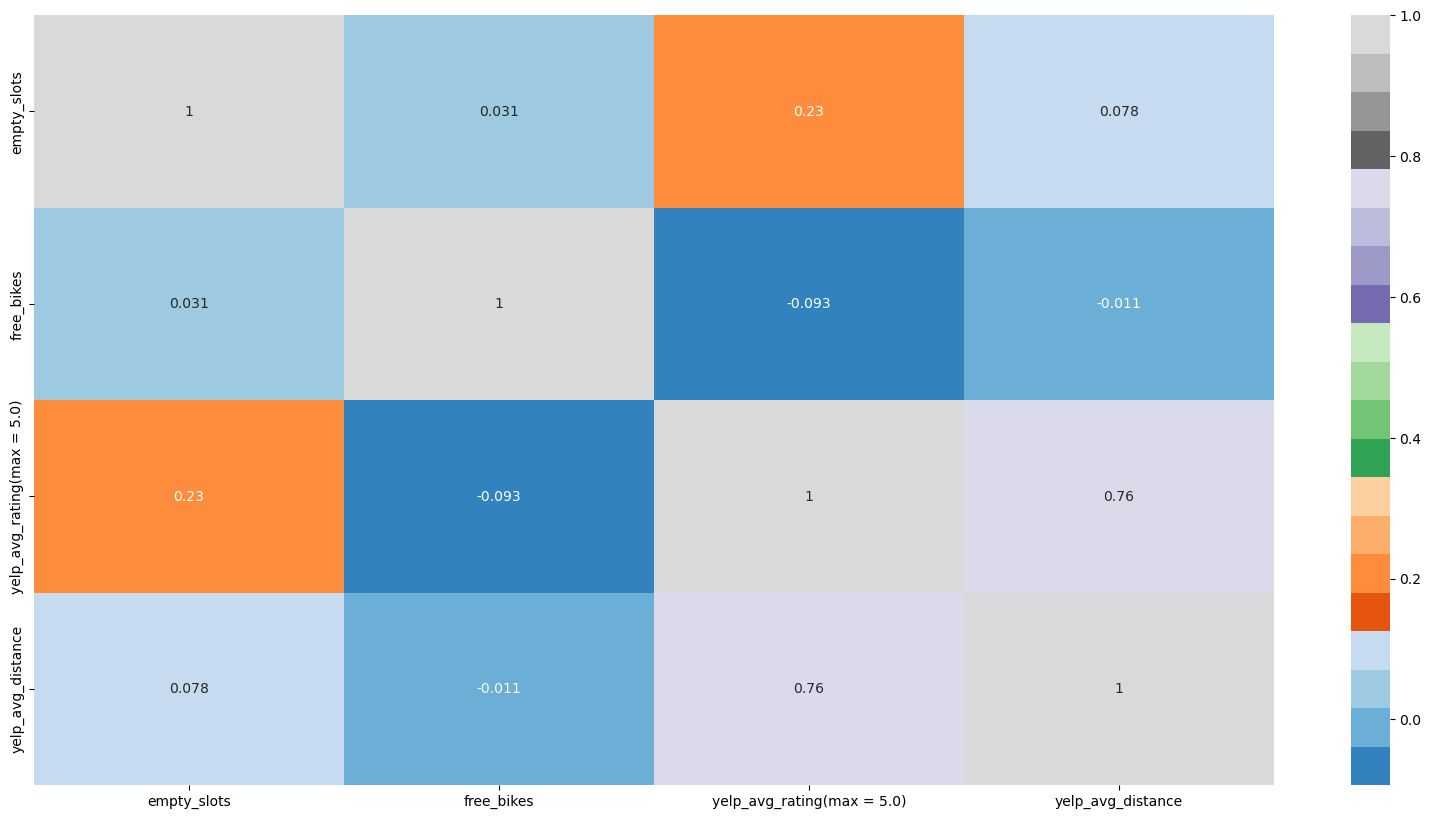

In [123]:
plt.figure(figsize = (20,10))
sns.heatmap(bikes_yelp.corr(), annot = True, cmap="tab20c")
plt.show()

### There is a strong correlation between 'yelp_avg_diatance' and the 'yelp_avg_rating'

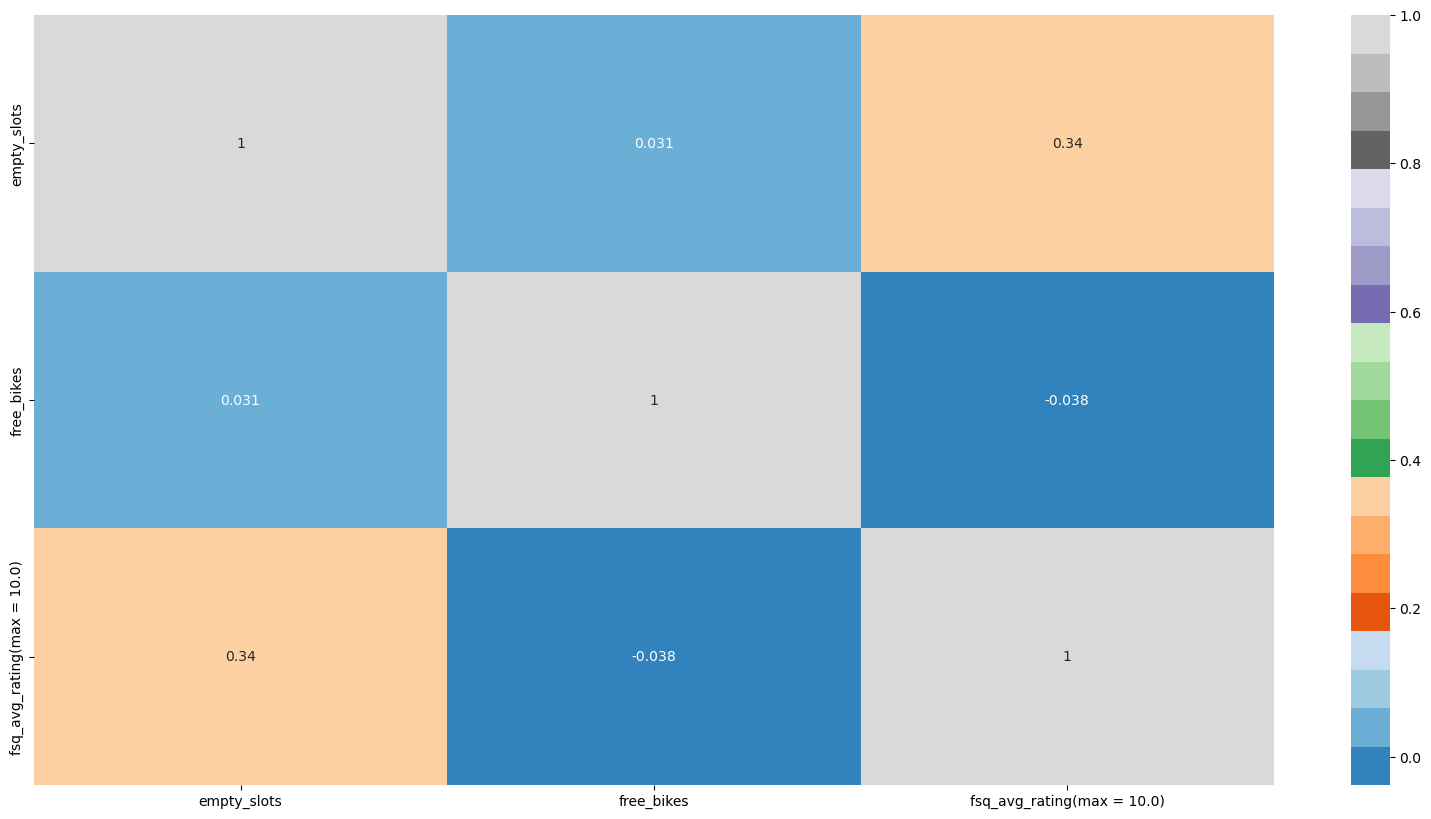

In [122]:
plt.figure(figsize = (20,10))
sns.heatmap(bikes_fsq.corr(), annot = True, cmap="tab20c")
plt.show()

### NOTE: From the correlation above it shows a weak correlation between the variables

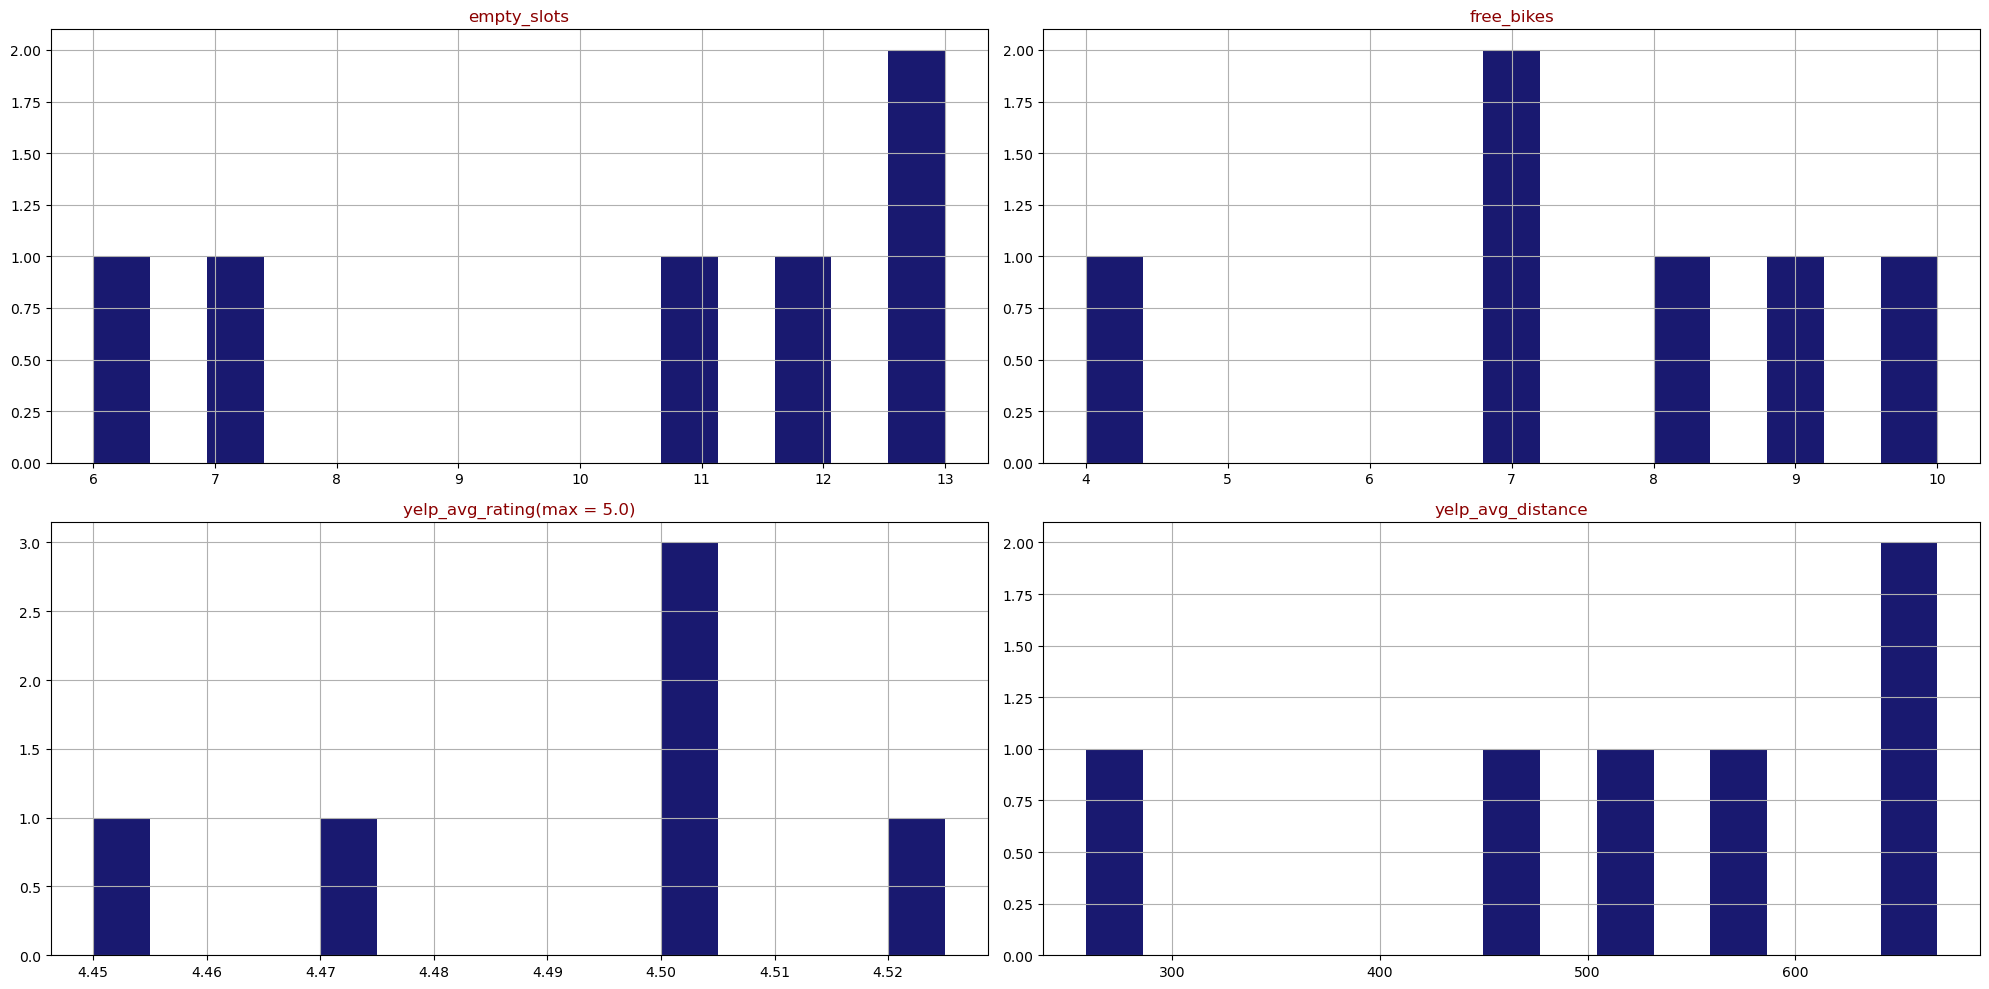

In [126]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=15,ax=ax,facecolor='midnightblue')
        ax.set_title(feature,color='DarkRed')
       
    fig.tight_layout()  
    plt.show()
draw_histograms(bikes_yelp,bikes_yelp.columns,2,2)

### The histogram shows a concentration of avg_ratings around 4.5, suggesting that moast POI has a good rating

### Histogram fot foursquare data

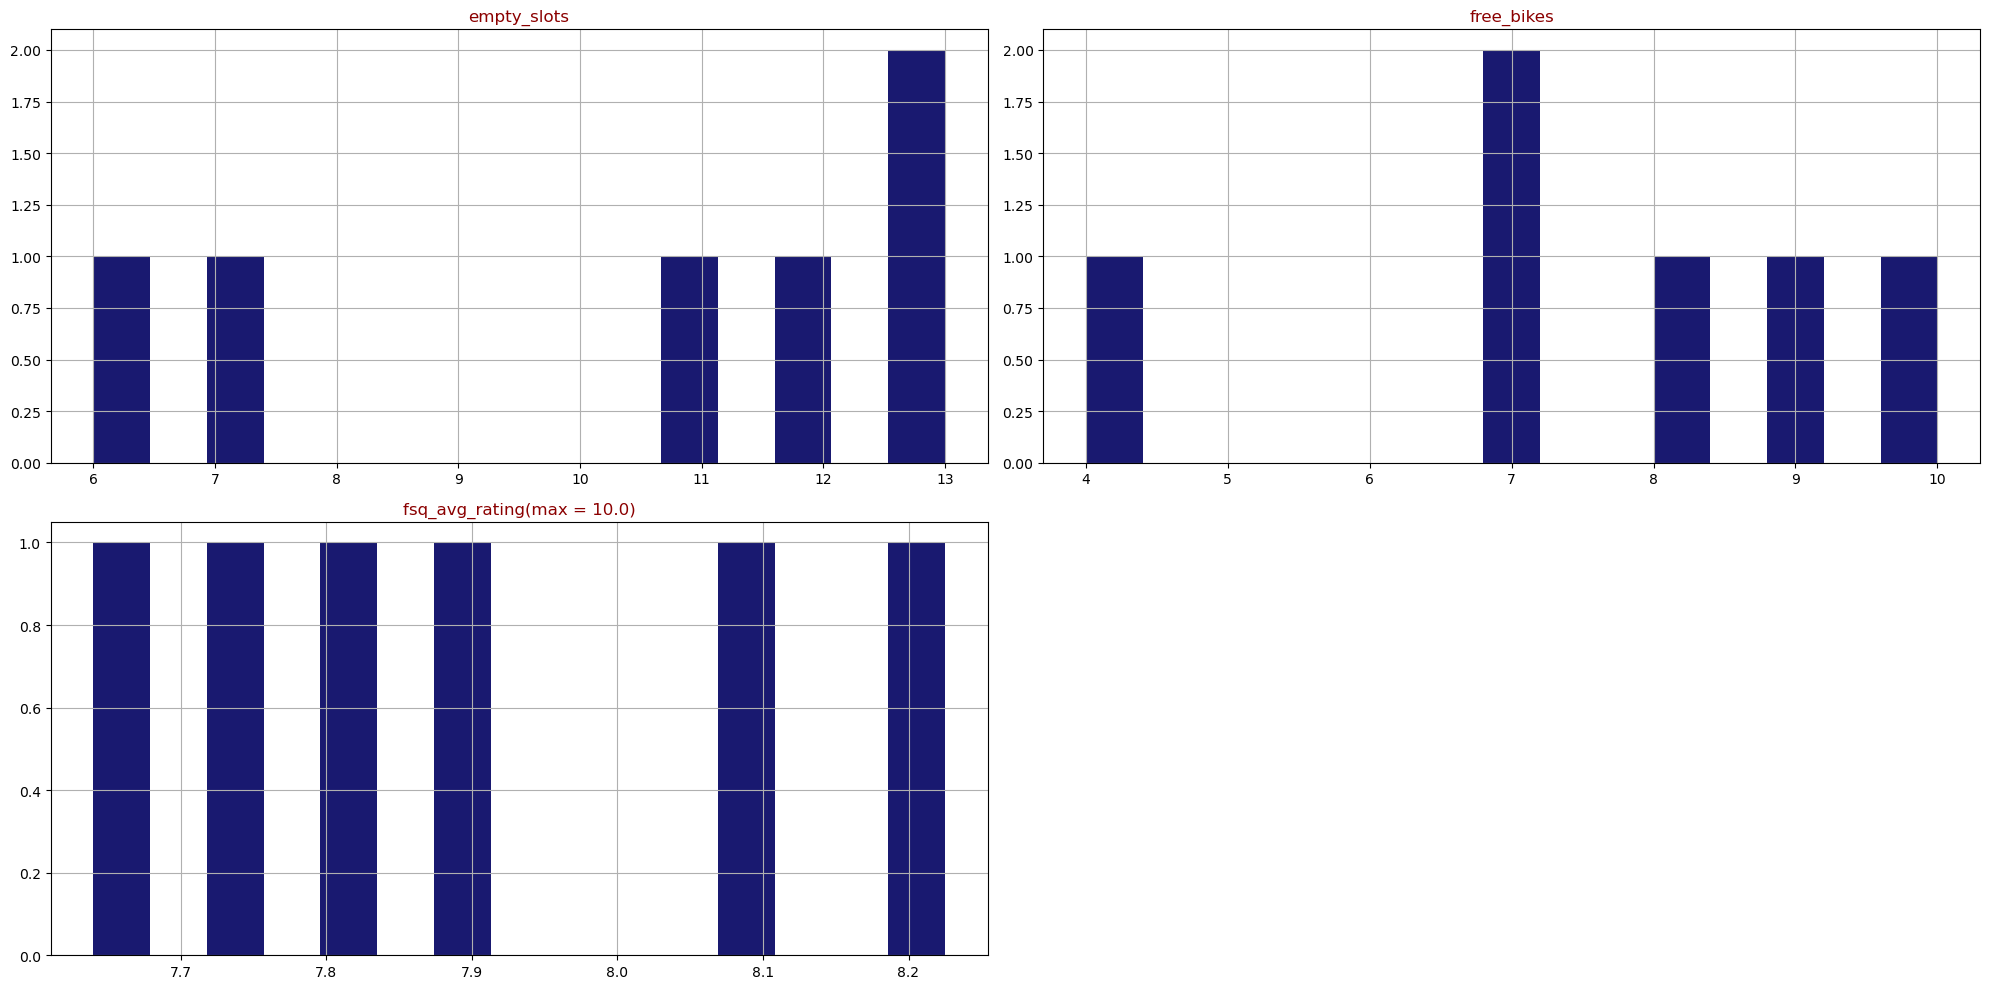

In [127]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=15,ax=ax,facecolor='midnightblue')
        ax.set_title(feature,color='DarkRed')
       
    fig.tight_layout()  
    plt.show()
draw_histograms(bikes_fsq,bikes_fsq.columns,2,2)

### The histogram suggests a concentration of ratings around 7.5-8.0, indicating that these values are more common in the dataset.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.